### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading California Housing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

### EXPLORATORY DATA ANALYSIS

In [3]:
data = fetch_california_housing(as_frame = True)
df = data.frame

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.shape

(20640, 9)

In [6]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


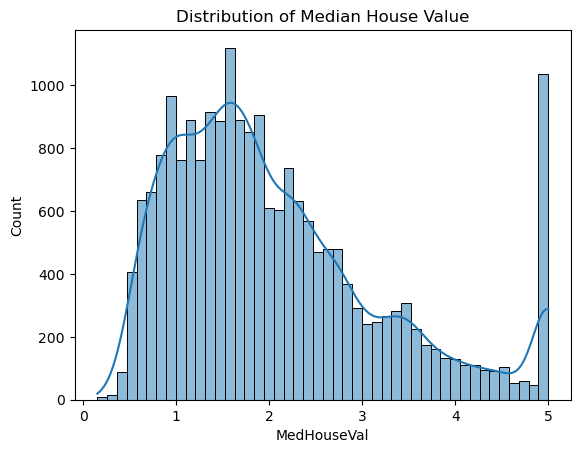

In [11]:
sns.histplot(df["MedHouseVal"], kde = True)
plt.title("Distribution of Median House Value")
plt.show()

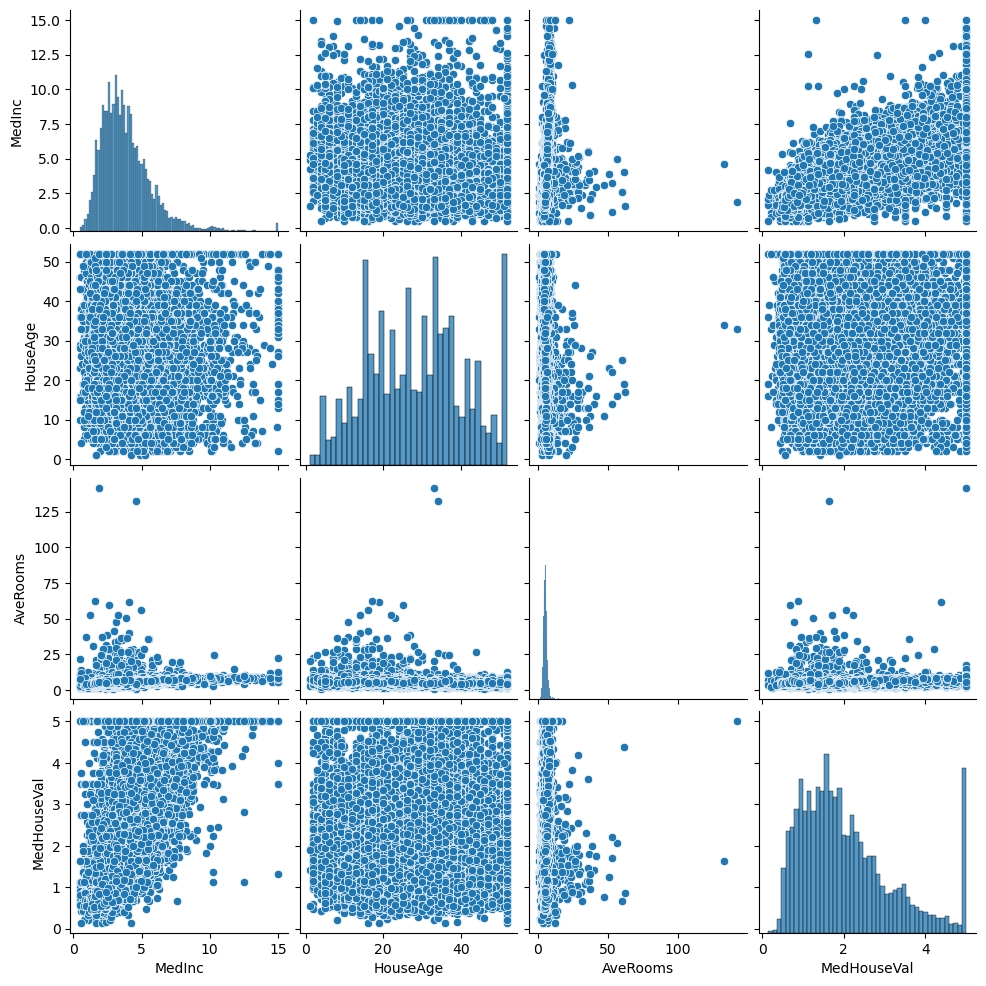

In [12]:
sns.pairplot(df[["MedInc", "HouseAge", "AveRooms", "MedHouseVal"]])

*Multicollinearity exists
*no null values
*Distribution is skewed

In [13]:
x = df.drop("MedHouseVal", axis = 1)
y = df["MedHouseVal"]

### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42
)

### FEATURE SCALING

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled.mean()

np.float64(-0.004744685732233164)

### LINEAR REGRESSION

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred_lr = lr.predict(X_test_scaled)

In [23]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

### RIDGE REGRESSION WITH HYPERPARAMETER TUNING

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {
    "alpha" : list(range(1, 1000))
}

In [26]:
ridge = Ridge()

In [27]:
grid = GridSearchCV(
    estimator = ridge,
    param_grid = param_grid,
    scoring = "neg_mean_squared_error",
    cv =  5
)

In [28]:
grid.fit(X_train_scaled, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [29]:
best_alpha = grid.best_params_["alpha"]
print(best_alpha)

1


In [30]:
best_ridge = grid.best_estimator_

In [31]:
y_pred_ridge = best_ridge.predict(X_test_scaled)

In [32]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"mse for ridge: {mse_ridge}")

mse for ridge: 0.5558548589435972


In [33]:
r2_ridge =  r2_score(y_test, y_pred_ridge)
print(f"r2 for ridge: {r2_ridge}")

r2 for ridge: 0.5758157428913682


### LASSO REGRESSION WITH HYPERPARAMETER TUNING

In [34]:
from sklearn.linear_model import Lasso

In [35]:
lasso = Lasso()

In [36]:
grid_param_lasso = {
    "alpha" : np.logspace(-3, 1, 10)
}

In [37]:
lasso_grid = GridSearchCV(
    estimator = Lasso(max_iter = 10000),
    param_grid = grid_param_lasso,
    scoring = "neg_mean_squared_error",
    cv = 5
)

In [38]:
lasso_grid.fit(X_train_scaled, y_train)

,estimator,Lasso(max_iter=10000)
,param_grid,{'alpha': array([1.0000...00000000e+01])}
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,np.float64(0.001)


In [39]:
best_lasso = lasso_grid.best_estimator_

In [40]:
y_pred_lasso = best_lasso.predict(X_test_scaled)

In [41]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [42]:
print(mse_lasso)
print(r2_lasso)

0.5544913600832686
0.5768562568705682


### RANDOM FOREST REGRESSION

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf = RandomForestRegressor(
    n_estimators = 100,
    random_state = 42
)

In [45]:
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
y_pred_rf = rf.predict(X_test)

In [47]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

### COMPARISON

##### Model Performance Comparison using MSE and R² Score

To compare the performance of different regression models, Mean Squared Error (MSE) and R² score were used as evaluation metrics.  
MSE measures the average squared difference between actual and predicted values, where lower values indicate better performance.  
R² score represents the proportion of variance in the target variable explained by the model, with higher values indicating better fit.


In [48]:
compare = pd.DataFrame({
    "Model" : ["Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest Regression"],
    "MSE" : [mse_lr, mse_ridge, mse_lasso, mse_rf],
    "r2_score" : [r2_lr, r2_ridge, r2_lasso, r2_rf]
})
compare

,Model,MSE,r2_score
0,Linear Regression,0.555892,0.575788
1,Ridge Regression,0.555855,0.575816
2,Lasso Regression,0.554491,0.576856
3,Random Forest Regression,0.255368,0.805123


### Final Results and Conclusion

In this project, multiple regression models were implemented and evaluated to predict house prices.Linear Regression was used as a base model.Ridge and Lasso regression were applied to handle multicollinearity and improve generalization, with hyperparameters tuned using GridSearchCV and cross-validation.

Among the linear models, Lasso Regression achieved the best performance, providing slightly lower Mean Squared Error (MSE) and higher R² score.

Then, a non-linear Regressor( Random Forest Regressor ) was introduced. The Random Forest model achieved strong predictive performance indicating that non-linear patterns exist in the data.

Overall, this project highlights the importance of selecting appropriate models based on data characteristics and comparing linear, regularized, and non-linear methods.